# Preprocessing data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')

# sex F(0) 591 M(1) 453
# famsize GT3(0) 738 LE3(1) 306
# Pstatus A(0) 121 T(1) 923
# Mjob at_home(0) 194 health(1) 82 other(2) 399 service(3) 239 teacher(4) 130
# Fjob at_home(0) 62 health(1) 41 other(2) 584 service(3) 292 teacher(4) 65
# higher yes(1) 955 no(0) 89
# romantic yes(1) 371 no(0) 673

In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch

columns_name = ['sex', 'famsize', 'Pstatus', 'higher', 'romantic']
encoder = OrdinalEncoder()
le = LabelEncoder()
df[columns_name] = encoder.fit_transform(df[columns_name])

# df['Dalc'] = le.fit_transform(df['Dalc'])
# df['Walc'] = le.fit_transform(df['Walc'])

In [4]:
selected_columns = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc', 'Walc']
df = df[selected_columns].copy()

In [5]:
X = df[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])
# 
yD = df['Dalc']
yW = df['Walc']
# selected = X[list(X.columns)]
# interestCols = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
#                       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
#                       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']

In [6]:
datasetD = {
    'data': X,
    'target': yD,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

datasetW = {
    'data': X,
    'target': yW,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health',
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}


bunchD = Bunch(**datasetD)
bunchW = Bunch(**datasetW)

X = bunchD.data
yD = bunchD.target
yW = bunchW.target

feature_names = bunchD.feature_names
class_names = bunchD.target_names

Import the important libraries of our modeling process

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV

# Import used models
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import pickle


# SVM

In [8]:
svcD = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
svcD.fit(X_train, y_train)
filename = 'svcD.sav'
pickle.dump(svcD, open(filename, 'wb'))

y_pred = svcD.predict(X_test)
# print(y_test, y_pred)
print(classification_report(y_test, y_pred)) #0.86

              precision    recall  f1-score   support

           1       0.93      0.89      0.91       153
           2       0.76      0.81      0.78        36
           3       0.82      0.90      0.86        10
           4       0.00      0.00      0.00         3
           5       0.56      0.71      0.62         7

    accuracy                           0.86       209
   macro avg       0.61      0.66      0.64       209
weighted avg       0.87      0.86      0.86       209


In [9]:
#print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(recall_score(y_test, y_pred, average='micro'))

In [10]:
from sklearn import svm

svcW = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
svcW.fit(X_train, y_train)

filename = 'svcW.sav'
pickle.dump(svcW, open(filename, 'wb'))

y_pred = svcW.predict(X_test)
# print(y_test, y_pred)
print(classification_report(y_test, y_pred)) # 0.74

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        81
           2       0.67      0.69      0.68        49
           3       0.67      0.62      0.64        39
           4       0.88      0.76      0.81        29
           5       0.60      0.55      0.57        11

    accuracy                           0.74       209
   macro avg       0.72      0.69      0.71       209
weighted avg       0.74      0.74      0.74       209


# Random Forest Tree

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=80)

rftD = RandomForestClassifier(max_depth=9, n_estimators=400, class_weight='balanced', random_state=30)
rftD.fit(X_train, y_train)
filename = 'rftD.sav'
pickle.dump(rftD, open(filename, 'wb'))
y_pred = rftD.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) #0.9138755980861244
print(classification_report(y_test, y_pred))

accuracy: 0.9138755980861244
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       149
           2       0.97      0.79      0.87        42
           3       0.73      0.67      0.70        12
           5       0.50      0.33      0.40         6

    accuracy                           0.91       209
   macro avg       0.78      0.69      0.73       209
weighted avg       0.91      0.91      0.91       209


In [12]:
# tree_to_plot = 2 
# 
# plt.figure(figsize=(30,20))
# plt.rcParams['lines.linewidth'] = 0.3
# plot_tree(rftD.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
rftW = RandomForestClassifier(max_depth=9, n_estimators=400, class_weight='balanced', random_state=80)
rftW.fit(X_train, y_train)
filename = 'rftW.sav'
pickle.dump(rftW, open(filename, 'wb'))

y_pred = rftW.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) # 0.7655502392344498
print(classification_report(y_test, y_pred))

accuracy: 0.7655502392344498
              precision    recall  f1-score   support

           1       0.77      0.88      0.82        81
           2       0.80      0.65      0.72        49
           3       0.71      0.62      0.66        39
           4       0.76      0.86      0.81        29
           5       0.80      0.73      0.76        11

    accuracy                           0.77       209
   macro avg       0.77      0.75      0.75       209
weighted avg       0.77      0.77      0.76       209


In [14]:
# tree_to_plot = 2 
# 
# plt.figure(figsize=(30,20))
# plt.rcParams['lines.linewidth'] = 0.3
# plot_tree(rftW.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

# XGBoost

In [15]:
modelD = XGBClassifier(n_estimators=300, max_depth=12, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1)

X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelD.fit(X_train, y_train)
filename = 'xgboostD.sav'
pickle.dump(modelD, open(filename, 'wb'))

y_pred = modelD.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred)) #0.9138755980861244

C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


              precision    recall  f1-score   support

           1       0.95      0.97      0.96       153
           2       0.83      0.81      0.82        36
           3       0.75      0.90      0.82        10
           4       0.00      0.00      0.00         3
           5       0.83      0.71      0.77         7

    accuracy                           0.91       209
   macro avg       0.67      0.68      0.67       209
weighted avg       0.90      0.91      0.91       209


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-pa

In [16]:
modelW = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.05, objective='multi:softmax', booster='gbtree', min_child_weight=1, sampling_method='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
# Transform the labels [1,2,3,4,5] to [0,1,2,3,4] in order to fit the model
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelW.fit(X_train, y_train)
filename = 'xgboostW.sav'
pickle.dump(modelW, open(filename, 'wb'))

y_pred = modelW.predict(X_test)
y_pred = le.inverse_transform(y_pred)
print(classification_report(y_test, y_pred))

C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


              precision    recall  f1-score   support

           1       0.76      0.86      0.81        81
           2       0.77      0.67      0.72        49
           3       0.90      0.69      0.78        39
           4       0.68      0.86      0.76        29
           5       0.86      0.55      0.67        11

    accuracy                           0.77       209
   macro avg       0.79      0.73      0.75       209
weighted avg       0.78      0.77      0.77       209


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, yD, test_size=0.2, random_state=30)
filenamesD = ['svcD', 'xgboostD']
resD = []
for filename in filenamesD:
    loaded_model = pickle.load(open(filename+'.sav', 'rb'))
    if filename == 'xgboostD':
        y_pred = loaded_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred)
        resD.append(y_pred)
    else:
        resD.append(loaded_model.predict(X_test))

for y_pred in resD:
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91       146
           2       0.81      0.76      0.78        38
           3       0.90      0.82      0.86        11
           4       0.00      0.00      0.00         5
           5       0.71      0.56      0.62         9

    accuracy                           0.86       209
   macro avg       0.66      0.61      0.64       209
weighted avg       0.85      0.86      0.85       209

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       156
           2       0.81      0.83      0.82        35
           3       0.90      0.75      0.82        12
           4       0.00      0.00      0.00         0
           5       0.71      0.83      0.77         6

    accuracy                           0.91       209
   macro avg       0.68      0.67      0.67       209
weighted avg       0.93      0.91      0.92       209


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\m

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, yW, test_size=0.2, random_state=80)
filenamesD = ['svcW', 'xgboostW']
resW = []
for filename in filenamesD:
    loaded_model = pickle.load(open(filename+'.sav', 'rb'))
    if filename == 'xgboostW':
        y_pred = loaded_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred)
        resW.append(y_pred)
    else:
        resW.append(loaded_model.predict(X_test))

for y_pred in resW:
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.85      0.79      0.82        87
           2       0.69      0.67      0.68        51
           3       0.62      0.67      0.64        36
           4       0.76      0.88      0.81        25
           5       0.55      0.60      0.57        10

    accuracy                           0.74       209
   macro avg       0.69      0.72      0.71       209
weighted avg       0.75      0.74      0.74       209

              precision    recall  f1-score   support

           1       0.86      0.76      0.81        92
           2       0.67      0.77      0.72        43
           3       0.69      0.90      0.78        30
           4       0.86      0.68      0.76        37
           5       0.55      0.86      0.67         7

    accuracy                           0.77       209
   macro avg       0.73      0.79      0.75       209
weighted avg       0.79      0.77      0.77       209


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


In [19]:
# # Use Grid Search CV to find the best parameters for xgboost model
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
# }
# 
# xgbc = XGBClassifier()
# y_train = le.fit_transform(y_train)
# #clf = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
# grid_search = GridSearchCV(
#     estimator=xgbc,
#     param_grid=params,
#     scoring = 'accuracy',
#     n_jobs = 10,
#     cv = 5,
#     verbose=True,
# )
# grid_search.fit(X_train, y_train)

In [20]:
# grid_search.best_params_

# Evaluating performance of different models

In [21]:
from sklearn import model_selection

In [38]:
# Preparing evaluation variables
resultsW = []
resultsD = []
seedW = 80
seedD = 30
names = ['SVM', 'RandomForest', 'XGBoost']
scoring = 'accuracy'
modelsW = ['svcW', 'rftW']
modelsD = ['svcD', 'rftD']
le = LabelEncoder()

In [39]:
# Evaluating models for weekend alcohol consumption
for model in modelsW:
    loaded_model = pickle.load(open(model+'.sav', 'rb'))
    kfold = model_selection.KFold(n_splits=10, random_state=seedW, shuffle=True)
    cv_results = model_selection.cross_val_score(loaded_model, X, yW, cv=kfold, scoring=scoring)
    resultsW.append(cv_results)
    msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
    print(msg)

loaded_model = pickle.load(open('xgboostW.sav', 'rb'))
kfold = model_selection.KFold(n_splits=10, random_state=seedW, shuffle=True)
yW = le.fit_transform(yW)
cv_results = model_selection.cross_val_score(loaded_model, X, yW, cv=kfold, scoring=scoring)
resultsW.append(cv_results)

msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

svcW: 0.751850 (0.036371)
rftW: 0.722106 (0.043249)


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astyp

xgboost: 0.774835 (0.038353)


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


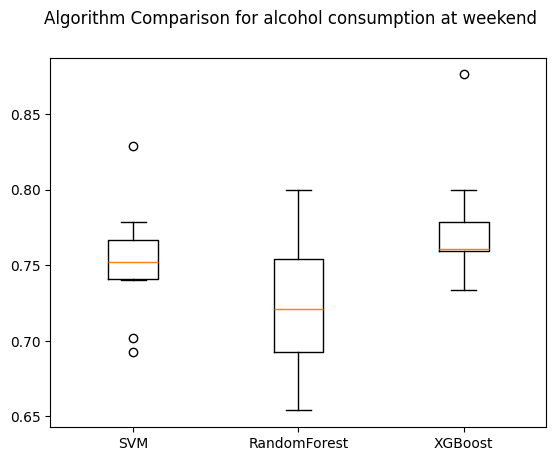

In [43]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm comparison for alcohol consumption at weekend')
ax = fig.add_subplot(111)
plt.boxplot(resultsW)
ax.set_xticklabels(names)
plt.savefig('boxplotWeekend.png')
plt.show()

In [41]:
# Evaluating models for weekend alcohol consumption
for model in modelsD:
    loaded_model = pickle.load(open(model+'.sav', 'rb'))
    kfold = model_selection.KFold(n_splits=10, random_state=seedD, shuffle=True)
    cv_results = model_selection.cross_val_score(loaded_model, X, yD, cv=kfold, scoring=scoring)
    resultsD.append(cv_results)

    msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
    print(msg)

loaded_model = pickle.load(open('xgboostD.sav', 'rb'))
kfold = model_selection.KFold(n_splits=10, random_state=seedD, shuffle=True)
yD = le.fit_transform(yD)
cv_results = model_selection.cross_val_score(loaded_model, X, yD, cv=kfold, scoring=scoring)
resultsD.append(cv_results)
# namesD.append('xgboost')

msg = "%s: %f (%f)" % ('xgboost', cv_results.mean(), cv_results.std())
print(msg)

svcD: 0.836273 (0.043785)
rftD: 0.855330 (0.045135)


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astyp

xgboost: 0.856310 (0.037600)


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\xgboost\core.py:248: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


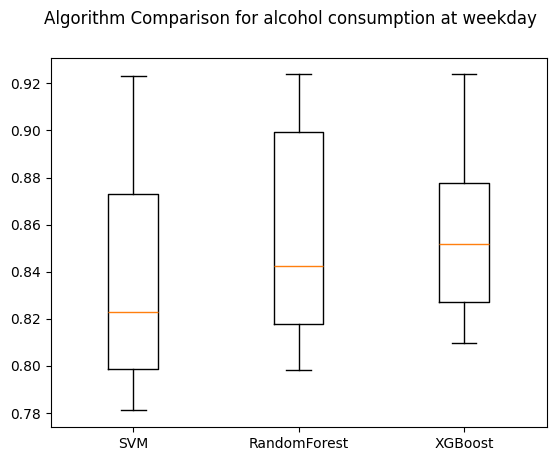

In [44]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm comparison for alcohol consumption at weekday')
ax = fig.add_subplot(111)
plt.boxplot(resultsD)
ax.set_xticklabels(names)
plt.savefig('boxplotWeekday.png')
plt.show()

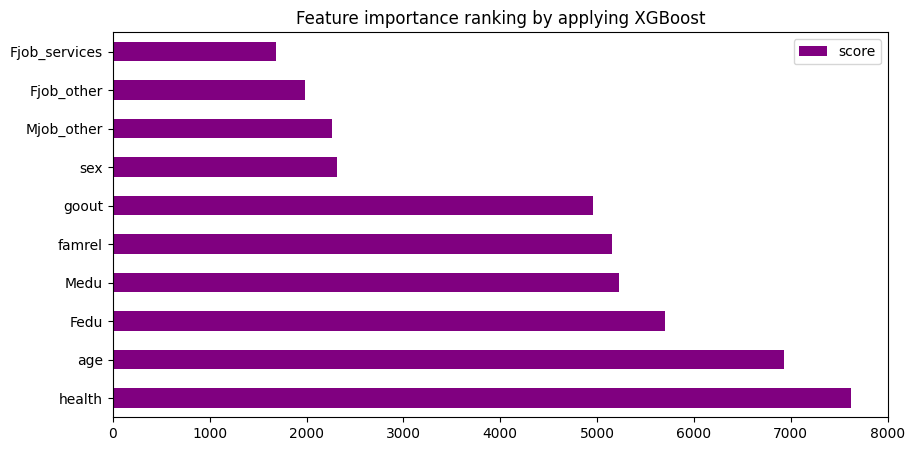

In [45]:
feature_importantW = modelW.get_booster().get_score(importance_type='weight')
feature_importantD = modelD.get_booster().get_score(importance_type='weight')
keysD = list(feature_importantD.keys())
valuesD = list(feature_importantD.values())
keysW = list(feature_importantW.keys())
valuesW = list(feature_importantW.values())
dataW = pd.DataFrame(data=valuesW, index=keysW, columns=["score"]).sort_values(by = "score", ascending=False)
dataD = pd.DataFrame(data=valuesD, index=keysD, columns=["score"]).sort_values(by = "score", ascending=False)
# dataW = pd.DataFrame(data=valuesW, index=keysW, columns=["score"])
# dataD = pd.DataFrame(data=valuesD, index=keysD, columns=["score"])

# comp = pd.concat([dataW, dataD], axis=1)
# comp.reorder_levels('score', axis=1)

# comp.nlargest(10, columns='score').plot(kind='barh', figsize = (10,5), color='blue')
# ax = dataW.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5), color='blue') ## plot top 10 features
dataW.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5), color='purple') ## plot top 10 features
plt.title('Feature importance ranking by applying XGBoost')
plt.savefig('featureImportance.png')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rftD, X, yD, n_repeats=30, random_state=seedD)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(feature_names[i],r.importances_mean[i], r.importances_std[i])

In [ ]:
global_importances_random = pd.Series(rftD.feature_importances_, index=X_train.columns)
global_importances_random.sort_values(ascending=True, inplace=True)